# Lab 01: Data preprocessing

Họ tên: Trần Quang An Quốc

MSSV: 20127304

**Cách làm bài**

Bạn sẽ làm trực tiếp trên file notebook này. Đầu tiên, bạn điền họ tên và MSSV vào phần đầu file ở bên trên. Trong file, bạn làm bài ở những chỗ có ghi là:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
hoặc đối với những phần code không bắt buộc thì là:
```python
# YOUR CODE HERE (OPTION)
```
hoặc đối với markdown cell thì là:
```markdown
YOUR ANSWER HERE
```
Tất nhiên, khi làm thì bạn xóa dòng `raise NotImplementedError()` đi.
Đối những phần yêu cầu code thì thường ở ngay phía dưới sẽ có một (hoặc một số) cell chứa các bộ test để giúp bạn biết đã code đúng hay chưa; nếu chạy cell này không có lỗi gì thì có nghĩa là qua được các bộ test. Trong một số trường hợp, các bộ test có thể sẽ không đầy đủ; nghĩa là, nếu không qua được test thì là code sai, nhưng nếu qua được test thì chưa chắc đã đúng.

Trong khi làm bài, bạn có thể cho in ra màn hình, tạo thêm các cell để test. Nhưng khi nộp bài thì bạn xóa hoặc comment các câu lệnh in ra màn hình. Bạn lưu ý <font color=red>không được tự tiện xóa các cell hay sửa code của các cell có sẵn</font> (trừ những chỗ được phép sửa như đã nói ở trên). Bên cạnh đó, các bạn có thể tự mình tạo thêm các hàm phụ trợ nhằm mục tiêu giải quyết bài toán

Trong khi làm bài, thường xuyên `Ctrl + S` để lưu lại bài làm của bạn, tránh mất mát thông tin.


*Nên nhớ mục tiêu chính ở đây là <font color=green>học, học một cách chân thật</font>. Bạn có thể thảo luận ý tưởng với bạn khác cũng như tham khảo các nguồn trên mạng, nhưng sau cùng <font color=green>code và bài làm phải là của bạn, dựa trên sự hiểu thật sự của bạn</font>. Khi tham khảo các nguồn trên mạng thì bạn cần ghi rõ nguồn trong bài làm. Bạn không được tham khảo bài làm của các bạn năm trước (vì nếu làm vậy thì bao giờ bạn mới có thể tự mình suy nghĩ để giải quyết vấn đề); sau khi kết thúc môn học, bạn cũng không được đưa bài làm cho các bạn khóa sau hoặc public bài làm trên Github (vì nếu làm vậy thì sẽ ảnh hưởng tới việc học của các bạn khóa sau).

<font color=red>Trong trường hợp bạn vi phạm những điều mình nói ở trên thì mình sẽ đề nghị giảng viên lý thuyết cho 0 điểm môn học.</font>

**Cách nộp bài**

Khi chấm bài, đầu tiên mình sẽ chọn `Kernel` - `Restart & Run All`, để restart và chạy tất cả các cell trong notebook của bạn; do đó, trước khi nộp bài, bạn nên chạy thử `Kernel` - `Restart & Run All` để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, bạn tạo thư mục nộp bài theo cấu trúc sau:
- Thư mục `MSSV` (vd, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`)
    - File `Lab01.ipynb` (không cần nộp các file khác)

Cuối cùng, bạn nén thư mục `MSSV` này lại và nộp ở link trên moodle. Đuôi của file nén phải là .zip (chứ không được .rar hay gì khác).

<font color=red>Bạn lưu ý tuân thủ chính xác qui định nộp bài ở trên.</font>

**Mục tiêu bài tập**

Sinh viên có khả năng hiểu và cài đặt lại các hàm bổ trợ cho việc tiền xử lý dữ liệu

**Mô tả yêu cầu**

Sinh viên sẽ đọc vào một file dữ liệu có định dạng `.csv` (các giá trị thiếu sẽ được ký hiệu bằng chuỗi rỗng), sau đó sẽ thực hiện lần lượt các yêu cầu liên quan đến tiền xử lý dữ liệu

## Import

In [1]:

import math
import csv


## Thu thập dữ liệu

Các bạn sẽ tải file điểm thi THPT 2019 tại [đây](https://drive.google.com/drive/folders/19f-UOvwN5hkpOqqXr84L7UdE71dXzWnY?usp=sharing)

## Phần 1: Tiền xử lý dữ liệu (7.5đ)

**Lưu ý:**

Sinh viên không được sử dụng các hàm có sẵn của pandas hay numpy mà cần phải tự cài đặt lại

Mô tả dữ liệu theo thứ tự cột:
```
id :                 int
Hoa :                float 
Li :                 float 
Ma_mon_ngoai_ngu :   str
Ngoai_ngu :          float 
Sinh :               float 
Toan :               float 
Van :                float
``` 

Tuy nhiên, đọc file bằng thư viện csv sẽ chuyển tất cả các giá trị về kiểu `str`, ta sẽ sẽ ép kiểu các giá trị số (trừ các giá trị rỗng) về theo kiểu dữ liệu phù hợp 

Đọc file dữ liệu

In [2]:
def data_reader(path):
    csv_reader = csv.reader(open(path, 'r'), delimiter=',')

    # Skip header
    data = []
    header = csv_reader
    for i,row in enumerate(csv_reader):
        if i == 0:
            header = row
            continue
        convert_list = []
        for i, element in enumerate(row):
            if element == '':
                convert_list.append(str(element))
                continue
            if i == 0:
                convert_list.append(int(element))
            elif i == 3:
                convert_list.append(str(element))
            else:
                convert_list.append(float(element))
        data.append(convert_list)
    return header, data

In [3]:
header, data = data_reader('diemthi2019.csv')

In [4]:
print("header: ", header)
print("So dong: ", len(data))

header:  ['id', 'Hoa', 'Li', 'Ma_mon_ngoai_ngu', 'Ngoai_ngu', 'Sinh', 'Toan', 'Van']
So dong:  296980


In [5]:
data[23:33]

[[23, 6.75, 5.25, 'N1', 3.6, 3.25, 7.0, 6.17],
 [24, 7.75, 7.0, 'N1', 5.4, 4.0, 7.8, 5.0],
 [25, 3.75, 3.5, '', '', '', 6.8, ''],
 [26, 4.5, 5.75, 'N1', 8.0, 4.75, 8.2, 6.0],
 [27, 3.5, 6.75, 'N1', 6.2, 3.0, 7.6, 7.25],
 [28, 3.0, 5.5, 'N1', 4.8, 3.75, 6.2, 4.75],
 [29, 3.75, 7.5, 'N1', 6.4, 2.5, 7.2, 6.75],
 [30, 3.75, 6.0, 'N1', 7.6, 4.25, 7.6, 7.25],
 [31, 4.5, 5.75, 'N1', 6.6, 4.75, 7.2, 5.5],
 [32, 7.0, 4.75, 'N1', 5.4, 7.0, 7.2, 8.0]]

### 1) Liệt kê các cột thiếu dữ liệu (0.5đ)
Hàm `checkNaN_col()` sẽ trả về `list` chứa tên cột nếu như cột bị thiếu dữ liệu

In [6]:
def checkNaN_col(data, header):
    """Hàm này sẽ liệt kê các cột có chứa dữ liệu có dạng chuỗi rỗng

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị
        header <list>: list chứa tên của các cột trong file dữ liệu

    Returns:
        <list>: danh sách chứa tên các cột có chứa giá trị chuỗi rỗng
    """
    # YOUR CODE HERE
    lst = []
    
    for col in range(len(header)):
        for row in range(len(data)):
            if data[row][col] == '': 
                lst.append(header[col])
                break
    return lst
    # raise NotImplementedError()

In [7]:
assert len(checkNaN_col(data, header)) == 7

Hàm `checkNaN_row()` sẽ trả về `list` chứa index của các dòng có tồn tại giá trị rỗng

In [8]:
def checkNaN_row(data):
    """Hàm này sẽ đếm số dòng có chứa dữ liệu có dạng chuỗi rỗng

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị
        
    Returns:
        <list>: danh sách chứa index của các dòng có tồn tại giá trị chuỗi rỗng
    """
    # YOUR CODE HERE
    lst = []
    for row in data:
        for element in row:
            if element == '':
                lst.append(row)
                break
    return lst
    # raise NotImplementedError()

In [9]:
row_have_NaN = checkNaN_row(data)
assert len(row_have_NaN) == 17753

### 2) Điền giá trị thiếu (1.5đ)
Điền giá trị thiếu bằng phương pháp constant (điền giá trị 0), mean, median vào giá trị thiếu cho cột numeric, và mode cho cột categorical. Đối với các thuộc tính numeric, giá trị điền vào sẽ là giá trị `float`, đối với thuộc tính categorical, giá trị điền vào sẽ là giá trị `str`

**Lưu ý:** khi tính mean, median hay mode các bạn cần bỏ qua giá trị bị thiếu. Khi thao tác trên các cột dạng float, kết quả phải được làm tròn ở hai chữ số bằng hàm `round()`

Hàm tính mean/median/mode của các cột tương ứng trong dữ liệu sẽ trả về một danh sách, chứa các giá trị mean/median/mode của các cột, và sẽ được hàm `fill_data()` sử dụng danh sách đó để điền vào giá trị thiếu



In [10]:
def sum_data(data):
    """Hàm này dùng để tính tổng theo các cột có dạng numeric

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list>, list chứa các giá trị tổng theo cột
        <list>: list chứa số lượng giá trị khác giá trị chuỗi rỗng
    """
    # Hàm này sẽ được dùng bổ trợ để tính sum và số lượng mẫu không bị thiếu của từng cột thuộc tính (trừ cột id)
    # YOUR CODE HERE (OPTION)
    sum_lst = [0 for i in range(len(data[0]))]
    count_lst = [0 for i in range(len(data[0]))]
    for col in range(len(data[0])):
        if col == 0 or isinstance(data[0][col], str) == True: continue
        for row in range(len(data)):
            if data[row][col] != "": 
                sum_lst[col] += data[row][col]
                count_lst[col] += 1
    return sum_lst, count_lst

In [11]:
def mean(data):
    """Hàm này dùng để tính trung bình theo các cột có dạng numeric

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list>: list chứa các giá trị trung bình theo từng cột
    """
    # YOUR CODE HERE
    res = []
    sum_lst, count_lst = sum_data(data)
    for i in range(len(sum_lst)):
        if sum_lst[i] != 0 and count_lst[i] != 0:
            res.append(round(sum_lst[i]/count_lst[i], 2))
    return res
    # raise NotImplementedError()

In [12]:
assert mean(data) == [5.34, 5.56, 4.76, 4.67, 6.8, 5.62]

In [13]:
def median(data):
    """Hàm này dùng để tính trung bình theo các cột có dạng numeric

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list>: list chứa các giá trị trung vị theo từng cột
    """
    # YOUR CODE HERE
    res = []
    for col in range(len(data[0])):
        tmp_lst = []
        for row in range(len(data)):
            if isinstance(data[0][col], float) == False:
                break
            if(data[row][col] != ""):
                tmp_lst.append(data[row][col])
        if(len(tmp_lst) != 0): 
            tmp_lst.sort()
            res.append(tmp_lst[int(len(tmp_lst)/2) + 1])
    return res
#   raise NotImplementedError()

In [14]:
assert median(data) == [5.5, 5.75, 4.4, 4.5, 7.0, 5.75]

In [15]:
def find_distinct_value(data):
    """Hàm này sẽ có nhiệm vụ tìm và trả về danh sách chứa các giá trị có thể có của cột 'Ma_mon_ngoai_ngu'

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list>: list đã được sắp xếp, chứa các giá trị chuỗi có thể có của cột 'Ma_mon_ngoai_ngu'
    """
    # # Chỉ cần quan tâm đến cột 'Ma_mon_ngoai_ngu' và tìm ra các giá trị có thể có
    # YOUR CODE HERE
    res = []
    for i in range(len(data)):
        if data[i][3] not in res and data[i][3] != '':
            res.append(data[i][3])
    return res
    # raise NotImplementedError()

Thực hiện đếm số lần xuất hiện của các giá trị đã được tìm và chọn ra giá trị xuất hiện nhiều lần nhất, nếu có nhiều giá trị cùng xuất hiện nhiều lần, thì chọn giá trị nhỏ hơn theo bảng chữ cái

In [16]:
def mode(data):
    """Hàm này sẽ có mục tiêu tìm ra giá trị chuỗi xuất hiện nhiều lần nhất. Để đơn giản, sinh viên chỉ cần quan đến cột 'Ma_mon_ngoai_ngu'

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        str: giá trị chuỗi xuất hiện nhiều lần nhất trong cột 'Ma_mon_ngoai_ngu', nếu có nhiều hơn một kết quả, chọn chuỗi nhỏ hơn theo bảng chữ cái
    """
    # YOUR CODE HERE
    my_dict = {}
    my_str = []
    for i in range(len(data)):
        if data[i][3] == "": continue
        if data[i][3] not in my_dict.keys():
            my_dict[data[i][3]] = 0
        else:
            my_dict[data[i][3]] += 1

    for key in my_dict.keys():
        if my_dict.get(key) == max(my_dict.values()):
            my_str.append(key)

    my_str.sort()

    return my_str[0]
    # raise NotImplementedError()

Hàm `fill_data` sẽ cho phép tùy chọn điền vào giá trị thiếu của cột dạng numeric bằng giá trị 0 hoặc `mean` hoặc `median`, còn cột có dạng categorical sẽ mặc định được fill bằng mode

In [17]:
def fill_data(data, type_on_numeric = 'mean'):
    """Hàm này có nhiệm vụ điền dữ liệu bị thiếu

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị
        type_on_numeric (str, optional): phương pháp điền dữ liệu cho cột numeric (const/mean/median)

    Returns:
        <list<list>>: dữ liệu sau khi đã được điền vào các giá trị thiếu, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """
    if type_on_numeric == 'const':
        # YOUR CODE HERE
        my_data = []
        for row in data:
            tmp = []
            for element in row:
                tmp.append(element)
            my_data.append(tmp)

        my_mode = mode(my_data)
        for col in range(len(my_data[0])):
            if isinstance(my_data[0][col], float) == False:
                for row in range(len(my_data)):
                    if my_data[row][col] == "":
                        my_data[row][col] = my_mode
                continue 
            for row in range(len(my_data)):
                if my_data[row][col] == "":
                    my_data[row][col] = 0.0
        return my_data
        # raise NotImplementedError()
    elif type_on_numeric == 'mean':
        # YOUR CODE HERE
        my_data = []
        for row in data:
            tmp = []
            for element in row:
                tmp.append(element)
            my_data.append(tmp)

        current = 0
        my_mode = mode(my_data)
        my_mean = mean(my_data)
        for col in range(len(my_data[0])):
            if isinstance(my_data[0][col], float) == False:
                for row in range(len(my_data)):
                    if my_data[row][col] == "":
                        my_data[row][col] = my_mode
                continue 
            for row in range(len(my_data)):
                if my_data[row][col] == "":
                    my_data[row][col] = my_mean[current]
            current+=1
        return my_data
        # raise NotImplementedError()
    elif type_on_numeric == 'median':
        # YOUR CODE HERE
        my_data = []
        for row in data:
            tmp = []
            for element in row:
                tmp.append(element)
            my_data.append(tmp)

        current = 0
        my_mode = mode(my_data)
        my_median = median(my_data)
        for col in range(len(my_data[0])):
            if isinstance(my_data[0][col], float) == False:
                for row in range(len(my_data)):
                    if my_data[row][col] == "":
                        my_data[row][col] = my_mode
                continue 
            for row in range(len(my_data)):
                if my_data[row][col] == "":
                    my_data[row][col] = my_median[current]
            current+=1
        return my_data
        # raise NotImplementedError() 

In [18]:
data_filled_const = fill_data(data, type_on_numeric = 'const')
data_filled_mean = fill_data(data, type_on_numeric = 'mean')
data_filled_median = fill_data(data, type_on_numeric = 'median')

In [19]:
assert data_filled_const[20] == [20, 3.0, 0, 'N1', 0, 5.0, 4.8, 0]
assert data_filled_const[25] == [25, 3.75, 3.5, 'N1', 0, 0, 6.8, 0]

In [20]:
assert data_filled_mean[20] == [20, 3.0, 5.56, 'N1', 4.76, 5.0, 4.8, 5.62]
assert data_filled_mean[25] == [25, 3.75, 3.5, 'N1', 4.76, 4.67, 6.8, 5.62]

In [21]:
assert data_filled_median[20] == [20, 3.0, 5.75, 'N1', 4.4, 5.0, 4.8, 5.75]
assert data_filled_median[25] == [25, 3.75, 3.5, 'N1', 4.4, 4.5, 6.8, 5.75]

### 3) Xóa các dòng và cột mang số lượng của giá trị thiếu lớn hơn một ngưỡng cho trước (0.5đ)
Hàm `filter_missing_row()` sẽ nhận vào dữ liệu và tỉ lệ ngưỡng `ratio` giữa số lượng dữ liệu thiếu và tổng số lượng thuộc tính. Lấy ví dụ, nếu `ratio=0.5` thì các hàng có số lượng giá trị thiếu lớn hơn 50% sẽ bị loại bỏ khỏi tập dữ liệu

In [22]:
def filter_missing_row(data, ratio = 0.5):
    """Hàm này có nhiệm vụ xóa đi các dòng có tỉ lệ dữ liệu bị thiếu LỚN HƠN HOẶC BẰNG một ngưỡng cho trước

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị
        ratio (float, optional): Tỉ lệ ngưỡng mà dữ liệu cho phép thiếu

    Returns:
        <list<list>>: dữ liệu sau khi đã được xóa bớt các dòng thiếu lượng lớn dữ liệu, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """
    # YOUR CODE HERE
    my_data = []
    for row in data:
        tmp = []
        for element in row:
            tmp.append(element)
        my_data.append(tmp)

    cur_row = 0
    while cur_row < len(my_data):
        count = 0
        for col in range(len(my_data[0])):
            if my_data[cur_row][col] == "": 
                count+=1
        if count/len(my_data[0]) >= ratio:
            del my_data[cur_row]
            cur_row -=1
        cur_row += 1
    return my_data
    # raise NotImplementedError()

In [23]:
assert len(filter_missing_row(data, 0.3)) == 285581

Hàm `filter_missing_col()` sẽ nhận vào dữ liệu và tỉ lệ ngưỡng `ratio` giữa số lượng dữ liệu thiếu và tổng số lượng mẫu. Lấy ví dụ, nếu `ratio=0.5` thì các thuộc tính (các cột) có số lượng giá trị thiếu lớn hơn 50% so với số lượng mẫu của tập dữ liệu sẽ bị loại bỏ

In [24]:
def filter_missing_col(data, header, ratio = 0.5):
    """Hàm này có nhiệm vụ xóa đi các cột có tỉ lệ dữ liệu bị thiếu LỚN HƠN HOẶC BẰNG một ngưỡng cho trước

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị
        ratio (float, optional): Tỉ lệ ngưỡng mà dữ liệu cho phép thiếu

    Returns:
        <list>: header đã được cập nhật thông qua việc loại bỏ đi bớt các cột không đủ điều kiện (nếu có loại bỏ)
        <list<list>>: dữ liệu sau khi đã được xóa bớt các cột thiếu lượng lớn dữ liệu, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """

    # YOUR CODE HERE
    my_data = []
    my_header = []
    for row in data:
        tmp = []
        for element in row:
            tmp.append(element)
        my_data.append(tmp)
    
    for element in header:
        my_header.append(element)

    lst_col = []
    for col in range(1, len(my_data[0])):
        count = 0
        for row in range(len(my_data)):
            if my_data[row][col] == "": 
                count+=1
        if count/len(my_data) >= ratio:
            lst_col.append(col)
    
    tmp_col = []
    for element in lst_col:
        tmp_col.append(element)
    check = 0
    i = 0
    while i < len(tmp_col):
        del my_header[tmp_col[i]]
        for k in range(len(tmp_col)):
            tmp_col[k] -= 1
        i+=1  
    
    for row in my_data:
        i = 0
        tmp_col = []
        for element in lst_col:
            tmp_col.append(element)
        check = 0
        while i < len(tmp_col):
            del row[tmp_col[i]]
            for k in range(len(tmp_col)):
                tmp_col[k] -= 1
            i+=1  
    return my_header, my_data
    # raise NotImplementedError()

In [25]:
new_header, new_data = filter_missing_col(data, header, 0.05)

In [26]:
assert new_header == ['id', 'Hoa', 'Li', 'Sinh', 'Toan', 'Van']
# Không tính cột id
assert len(new_data[0]) - 1 == 5

### 4) Xóa các mẫu bị trùng lặp (0.5đ)
Kiểm tra, xác định các dòng bị trùng dữ liệu và xóa các dòng đó. 

Với mỗi dòng, so sánh với các dòng dữ liệu bên dưới để kiểm tra sự trùng lặp, các dòng sẽ được xem là trùng lặp nếu tất cả các thuộc tính giống nhau.

Gợi ý: với mỗi dòng dữ liệu tổng hợp lại thành một chuỗi `str` nào đó rồi đưa vào `set`, sau đó dùng `set` để kiểm tra xem dữ liệu đã xuất hiện chưa. 

In [27]:
def remove_duplicate(data):
    """Hàm này sẽ thực hiện loại bỏ các dòng bị trùng lặp VỀ MẶT DỮ LIỆU (không xét cột id)

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list<list>>: dữ liệu sau khi đã được xóa bớt các dòng trùng lặp, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """
    # YOUR CODE HERE
    my_data = []
    for row in data:
        tmp = []
        for col in range(1, len(row)):
            tmp.append(row[col])
        my_data.append(tmp)

    my_set = set()
    for row in my_data:
        my_set.add(str(row))
    
    lst_res = list(my_set)
    return lst_res 
    # raise NotImplementedError()

In [28]:
assert len(remove_duplicate(data)) == 292762

### 5) Loại bỏ bớt giá trị cực hạn của các cột numeric (1đ)

Sinh viên sẽ sử dụng luật 2 sigma (95% dữ liệu sẽ thuộc đoạn [$\mu \pm 2*\sigma$]) và 3 sigma (99.7% dữ liệu sẽ thuộc đoạn [$\mu \pm 3*\sigma$]) để loại bỏ các mẫu có giá trị mang giá trị không bình thường.

Hàm `std()` sẽ trả về danh sách chứa các giá trị độ lệch chuẩn của các cột có dạng numeric

Hàm `remove_outlier()` sẽ loại bỏ các nhiều bằng các sử dụng lại kết quả của hàm `std()` và hàm `mean()`

**Lưu ý:** Các số float cần phải được làm tròn về 2 chữ số bằng hàm `round()`

In [29]:
from math import sqrt


def std(data):
    """Hàm này dùng để tính độ lệch chuẩn theo các cột có dạng numeric

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list>: list chứa các giá trị độ lệch chuẩn theo từng cột
    """
    # YOUR CODE HERE
    lst_mean = mean(data)
    col_mean = 0
    res = []

    for col in range(1, len(data[0])):
        count = 0
        sum = 0.0
        s = 0.0
        if isinstance(data[0][col], float) == False and isinstance(data[0][col], int) == False:
            continue
        for row in range(len(data)):
            if data[row][col] != "":
                count += 1
                sum += (data[row][col] - lst_mean[col_mean])**2
        if(sum != 0):
            s = round(sqrt(sum / (count - 1)), 2)
            res.append(s)
        col_mean += 1
    return res
    # raise NotImplementedError() 

In [30]:
assert std(data) == [1.59, 1.62, 1.78, 1.25, 1.39, 1.11]

Hàm `remove_outlier()` sẽ nhận vào `data` và số `k`-sigma mà chúng ta muốn chọn ra từ dữ liệu, dòng dữ liệu sẽ được giữ lại nếu:
$$
(\mu_i - k*\sigma_i) \le value_i \le (\mu + k*\sigma_i)
$$

Với $\sigma_i, value_i$ lần lượt là giá trị của cột $i$ và độ lệch chuẩn của cột $i$ 

In [31]:
from tqdm import tqdm

def remove_outlier(data, k):
    """Hàm này sẽ loại bỏ các dòng chứa ít nhất một giá trị không thuộc đoạn cho phép ứng với mean và std của từng cột

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị
        k <float>: số lượng sigma được dùng để tính khoảng 

    Returns:
        <list<list>>: dữ liệu sau khi đã được xóa bớt các dòng có chứa giá trị không thuộc đoạn dữ liệu cho phép, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """
    # YOUR CODE HERE
    my_lst = []
    my_data = []
    for row in data:
        tmp = []
        for col in range(len(row)):
            tmp.append(row[col])
        my_data.append(tmp)
        
    lst_std = std(my_data)
    lst_mean = mean(my_data)
    for row in range(len(my_data)):
        count = 0
        for col in range(1, len(my_data[0])):
            if isinstance(my_data[row][col], float) == True and my_data[row][col] != "":
                if my_data[row][col] < round(lst_mean[count] - k*lst_std[count], 2) or my_data[row][col] > round(lst_mean[count] + k*lst_std[count], 2):
                    # print(lst_mean[count] - k*lst_std[count], my_data[row][col], lst_mean[count] + k*lst_std[count])
                    # print(my_data[row][col], lst_mean[count], lst_std[count], row, col, count)
                    my_lst.append(row)
                    break
            if isinstance(my_data[row][col], float) == True:
                count += 1
            if(count == len(lst_mean) or count == len(lst_std)):
                break

    cnt = 0
    while(cnt < len(my_lst)):
        del(my_data[my_lst[cnt]])
        for i in range(cnt, len(my_lst)):
            my_lst[i]-=1
        cnt+=1
    return my_data
    # raise NotImplementedError()

Do hàm này có khá nhiều phép so sánh nên mình sẽ chọn ra 1000 mẫu đầu tiên của dữ liệu để kiểm tra hàm

In [32]:
sampled_data = data[0:1000]
assert len(remove_outlier(sampled_data, k = 2)) == 810

# assert len(remove_outlier(sampled_data, k = 2)) == 825

AssertionError: 

### 6) Tính điểm tổ hợp môn (1.5đ)

Sinh viên cần tạo thêm các cột mới chứa điểm tổ hợp các môn theo thứ tự lần lượt [`A`, `A1`, `A2`, `B`, `D`]. Cụ thể, sinh viên cần tính điểm tổ hợp khối `A`, khối `A1`, khối `A2`, khối `B` và khối `D` theo cách tính.

Cột `A` = `Toan` + `Li` + `Hoa`

Cột `A1` = `Toan` + `Li` + `Ngoai_ngu`

Cột `A2` = `Toan` + `Hoa` + `Ngoai_ngu` 

Cột `B` = `Toan` + `Hoa` + `Sinh`

Cột `D` = `Toan` + `Van` + `Ngoai_ngu`

**Lưu ý:** khối `A1`, khối `A2` chỉ được tính khi `Ma_mon_ngoai_ngu = N1`, nếu `Ma_mon_ngoai_ngu != N1`, thì cột `A1` và `A2` sẽ có giá trị 0

Xét ví dụ: 

+ Cho header

['id', 'Hoa', 'Li', 'Ma_mon_ngoai_ngu', 'Ngoai_ngu', 'Sinh', 'Toan', 'Van']

+ Xét mẫu dữ liệu

[0, 4.5, 8.25, 'N1', 8.0, 6.0, 8.6, 6.17]

+ Header sẽ được xây dựng thành

['id', 'Hoa', 'Li', 'Ma_mon_ngoai_ngu', 'Ngoai_ngu', 'Sinh', 'Toan', 'Van', `'A'`, `'A1'`, `'A2'`, `'B'`, `'D'`]

+ Dữ liệu xây dựng thành

[0, 4.5, 8.25, N1, 8.0, 6.0, 8.6, 6.17, `A`, `A1`, `A2`, `B`, `D`]

+ Và bằng

[0, 4.5, 8.25, N1, 8.0, 6.0, 8.6, 6.17, `21.35`, `24.85`, `21.1`, `19.1`, `22.77`]

Sinh viên sử dụng dữ liệu đã được điền đầy đủ giá trị bằng giá trị 0 (data_filled_const) để tính tổng, vì thí sinh không dự thi đồng nghĩa với điểm bằng 0 khi xét tổ hợp môn. Điểm số sẽ được làm tròn tối đa 2 chữ số thập phân bằng hàm `round()`

In [33]:
# Sinh viên uncomment đoạn code này để đọc vào dữ liệu đã được điền thiếu có sẵn nếu không làm được câu 2
# header, data_filled_const = data_reader('data_filled_const.csv')
# assert data_filled_const[20] == [20, 3.0, 0, 'N1', 0, 5.0, 4.8, 0]

In [34]:
def calculate_combination(data, header):
    """Hàm này sẽ có nhiệm vụ xây dựng nên các thuộc tính mới cho dữ liệu, cụ thể là tính điểm tổ hợp các khối liên quan

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị
        header <list>: list chứa tên của các cột thuộc tính


    Returns:
        <list>: header đã được cập nhật thêm tên của các cột thuộc tính mới
        <list<list>>: dữ liệu sau khi đã được xóa bớt các dòng có chứa giá trị không thuộc đoạn dữ liệu cho phép, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """
    # YOUR CODE HERE
    my_data = []
    my_header = []
    temp_head = ["A", "A1", "A2", "B", "D"]
    temp_zero = [0, 0, 0, 0, 0]

    for row in data_filled_const:
        tmp = []
        for col in range(len(row)):
            tmp.append(row[col])
        my_data.append(tmp)

    for element in header:
        my_header.append(element)

    for element in temp_head:
        my_header.append(element)

    for i in range(len(my_data)):
        for j in range(len(temp_zero)):
            my_data[i].append(temp_zero[j])

    for row in my_data:
        row[8] = round(row[1] + row[2] + row[6], 2) 
        row[9] = round(row[2] + row[4] + row[6], 2)
        row[10] = round(row[1] + row[4] + row[6], 2)
        row[11] = round(row[1] + row[5] + row[6], 2)
        row[12] = round(row[4] + row[6] + row[7], 2)
        if(row[3] != "N1"): 
            row[9] = 0
            row[10] = 0
    return my_header, my_data
    # raise NotImplementedError()

In [35]:
new_header, new_data = calculate_combination(data_filled_const, header)

In [36]:
assert new_header == ['id', 'Hoa', 'Li', 'Ma_mon_ngoai_ngu', 'Ngoai_ngu', 'Sinh', 'Toan', 'Van', 'A', 'A1', 'A2', 'B', 'D']
assert new_data[0] == [0, 4.5, 8.25, 'N1', 8.0, 6.0, 8.6, 6.17, 21.35, 24.85, 21.1, 19.1, 22.77]

### 7) Chuẩn hóa dữ liệu (1đ)

Sinh viên cần chuẩn hóa các cột dạng numeric theo phương pháp min-max và Z-score

Sử dụng kết quả dữ liệu tìm được ở câu 2 để làm input cho hàm chuẩn hóa 

In [37]:
# Sinh viên uncomment đoạn code này để đọc vào dữ liệu đã được điền thiếu có sẵn nếu không làm được câu 2
# header, data_filled_const = data_reader('data_filled_const.csv')
# assert data_filled_const[20] == [20, 3.0, 0, 'N1', 0, 5.0, 4.8, 0]

In [38]:
def min_max_value(data):
    """Hàm này sẽ có nhiệm vụ tìm các giá trị min và max theo từng cột thuộc tính của dữ liệu đầu vào

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list>: list chứa các giá trị min ứng với từng cột thuộc tính có dạng numeric
        <list>: list chứa các giá trị max ứng với từng cột thuộc tính có dạng numeric
    """
    # YOUR CODE HERE (OPTIONAL)
    my_data = []
    for row in data_filled_const:
        tmp = []
        for col in range(len(row)):
            tmp.append(row[col])
        my_data.append(tmp)
    
    min_lst = []
    max_lst = []
    for col in range(len(my_data[0])):
        min = 10000
        max = 0
        if isinstance(my_data[0][col], float) == False:
            continue
        for row in range(len(my_data)):
            if my_data[row][col] < min:
                min = my_data[row][col]
            if my_data[row][col] > max:
                max = my_data[row][col]
        min_lst.append(min)
        max_lst.append(max)
    return min_lst, max_lst

In [39]:
def min_max_scaler(data):
    """Hàm này sẽ có nhiệm vụ chuẩn hóa dữ liệu theo phương pháp min-max

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list<list>>: dữ liệu sau khi đã được chuẩn hóa theo phương pháp min-max, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """
    # YOUR CODE HERE
    my_data = []
    for row in data_filled_const:
        tmp = []
        for col in range(len(row)):
            tmp.append(row[col])
        my_data.append(tmp)
    min_lst, max_lst = min_max_value(my_data)
    
    cnt = 0
    for col in range(len(my_data[0])):
        if isinstance(my_data[0][col], float) == False:
            continue
        for row in range(len(my_data)):
            my_data[row][col] = round((my_data[row][col] - min_lst[cnt])/(max_lst[cnt] - min_lst[cnt]), 2)
        cnt+=1
    return my_data
    # raise NotImplementedError()

In [40]:
def standard_scaler(data):
    """Hàm này sẽ có nhiệm vụ chuẩn hóa dữ liệu theo phương pháp z-score. Sử dụng lại hàm mean() và std() nếu có thể.

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list<list>>: dữ liệu sau khi đã được chuẩn hóa theo phương pháp z-score, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """
    # YOUR CODE HERE
    my_data = []
    for row in data_filled_const:
        tmp = []
        for col in range(len(row)):
            tmp.append(row[col])
        my_data.append(tmp)

    mean_lst = mean(my_data)
    std_lst = std(my_data)

    cnt = 0
    for col in range(len(my_data[0])):
        if isinstance(my_data[0][col], float) == False:
            continue
        for row in range(len(my_data)):
            my_data[row][col] = round((my_data[row][col] - mean_lst[cnt])/std_lst[cnt], 2)
        cnt+=1
    return my_data 
    # raise NotImplementedError()

In [41]:
min_max_normalized_data = min_max_scaler(data_filled_const)
standard_normalized_data = standard_scaler(data_filled_const)

In [42]:
assert min_max_normalized_data[0] == [0, 0.45, 0.82, 'N1', 0.8, 0.6, 0.86, 0.65]
assert standard_normalized_data[0] == [0, -0.5, 1.58, 'N1', 1.72, 1.02, 1.29, 0.5]

# assert min_max_normalized_data[0] == [0, 0.45, 0.82, 'N1', 0.8, 0.6, 0.86, 0.65]
# assert standard_normalized_data[0] == [0, -0.5, 1.59, 'N1', 1.72, 1.03, 1.29, 0.5]

AssertionError: 

### 8) Mã hóa one-hot (1đ)

Biến đổi cột `Ma_mon_ngoai_ngu` (cột dạng categorical) theo phương pháp mã hóa one-hot

Xét ví dụ: 

+ Cho header

['id', 'Hoa', 'Li', 'Ma_mon_ngoai_ngu', 'Ngoai_ngu', 'Sinh', 'Toan', 'Van']

+ Xét mẫu dữ liệu

[0, 4.5, 8.25, 'N1', 8.0, 6.0, 8.6, 6.17]

+ Header được xây dựng thành

['id', 'Hoa', 'Li', 'Ngoai_ngu', 'Sinh', 'Toan', 'Van', `'N1'`, `'N2'`, `'N3'`, `'N4'`, `'N5'`, `'N6'`]

+ Và dữ liệu bằng

[0, 4.5, 8.25, 8.0, 6.0, 8.6, 6.17, `1`, `0`, `0`, `0`, `0`, `0`]

**Lưu ý:** Sinh viên cần tự cài đặt hàm tìm các giá trị có thể có của một cột dạng categorical và lưu các giá trị của cột đó bằng một danh sách đã được sắp xếp tăng dần theo bảng chữ cái (nếu không thực hiện được câu 2)

Sử dụng kết quả dữ liệu tìm được ở câu 2 để làm input

In [43]:
# Sinh viên uncomment đoạn code này để đọc vào dữ liệu đã được điền thiếu có sẵn nếu không làm được câu 2
# header, data_filled_const = data_reader('data_filled_const.csv')
# assert data_filled_const[20] == [20, 3.0, 0, 'N1', 0, 5.0, 4.8, 0]

In [44]:
def OneHotEncoder(data, header):
    """Hàm này sẽ có nhiệm mã hóa one-hot dữ liệu trên cột 'Ma_mon_ngoai_ngu'

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị
        header <list>: list chứa tên của các cột thuộc tính


    Returns:
        <list>: header đã được cập nhật thêm tên của các cột thuộc tính mới và đã loại bỏ đi cột 'Ma_mon_ngoai_ngu'
        <list<list>>: dữ liệu sau khi đã được mã hóa one-hot, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """
    # YOUR CODE HERE
    tmp_head = ["N1", "N2", "N3", "N4", "N5", "N6"]
    my_header = []
    for element in header:
        my_header.append(element)
    for element in tmp_head:
        my_header.append(element)

    my_data = []
    for row in data_filled_const:
        tmp = []
        for col in range(len(row)):
            tmp.append(row[col])
        my_data.append(tmp)
    
    for i in range(len(my_data)):
        for j in range(len(tmp_head)):
            my_data[i].append(0)
    
    for element in my_data:
        if(element[3] == "N1"): element[8] = 1
        if(element[3] == "N2"): element[9] = 1
        if(element[3] == "N3"): element[10] = 1
        if(element[3] == "N4"): element[11] = 1
        if(element[3] == "N5"): element[12] = 1
        if(element[3] == "N6"): element[13] = 1
        del element[3] 
    
    return my_header, my_data
    # raise NotImplementedError()

In [45]:
new_header, new_data = OneHotEncoder(data_filled_const, header)

In [46]:
assert new_data[0] == [0, 4.5, 8.25, 8.0, 6.0, 8.6, 6.17, 1, 0, 0, 0, 0, 0]

## Phần 2: Làm quen với numpy và pandas (2.5đ)

Đa số các yêu cầu trên đề được hỗ trợ bởi pandas và numpy. 

Sang đến phần này yêu cầu sinh viên tính độ tương quan giữa các cặp thuộc tính dạng numeric. 

Phần này cho phép sinh viên sử làm quen và sử dụng pandas để tính toán, và trực quan, tuy nhiên phần nào mình yêu cầu cài đặt thì sinh viên không được sử dụng thư viện có sẵn.

Phần này sinh viên có thể tạo thêm cell nếu cần thiết

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [48]:
df = pd.read_csv('data_filled_const.csv', index_col = 'id')
df

,Hoa,Li,Ma_mon_ngoai_ngu,Ngoai_ngu,Sinh,Toan,Van
id,,,,,,,
0,4.50,8.25,N1,8.0,6.00,8.6,6.17
1,5.75,7.50,N1,4.4,3.00,7.2,6.75
2,3.50,5.50,N1,2.2,3.75,5.6,4.50
3,5.00,7.00,N1,3.6,4.75,7.0,6.25
4,6.75,8.00,N1,8.8,6.25,7.8,7.25
...,...,...,...,...,...,...,...
296975,5.50,5.50,N1,2.8,3.75,6.6,4.00
296976,4.50,5.25,N1,3.8,5.75,6.2,4.50
296977,3.25,4.25,N1,3.2,5.50,5.4,5.75


### 9) Tính độ tương quan giữa các cột thuộc tính (1đ)

Sinh viên thực hiện tính độ tương quan (correlation) giữa các cặp thuộc tính có dạng numeric, và trực quan hóa theo biểu đồ heat map

Tham khảo:

[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

[https://seaborn.pydata.org/generated/seaborn.heatmap.html](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Sau đó sử dụng thông tin về độ tương quan để kiểm tra giả thuyết :

    Thí sinh học toán tốt sẽ có xu hướng học lý hoặc học hóa tốt

In [49]:
my_corr = df.corr()
print(my_corr)

                Hoa        Li  Ngoai_ngu      Sinh      Toan       Van
Hoa        1.000000  0.464697   0.196722  0.442047  0.607453  0.211262
Li         0.464697  1.000000   0.462683  0.134804  0.635828  0.338581
Ngoai_ngu  0.196722  0.462683   1.000000  0.290780  0.462935  0.468101
Sinh       0.442047  0.134804   0.290780  1.000000  0.359827  0.344441
Toan       0.607453  0.635828   0.462935  0.359827  1.000000  0.285209
Van        0.211262  0.338581   0.468101  0.344441  0.285209  1.000000


<AxesSubplot:>

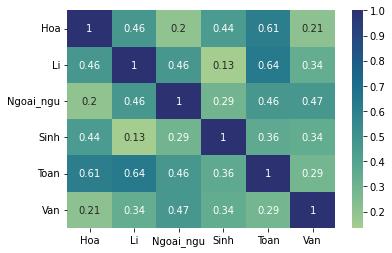

In [50]:
sb.heatmap(my_corr, annot= True, cmap="crest")

In [51]:
my_df1 = pd.DataFrame(df, columns=["Toan", "Hoa"])
my_df2 = pd.DataFrame(df, columns=["Toan", "Li"])

my_core1 = my_df1.corr()
my_core2 = my_df2.corr()

print(my_core1)
print(my_core2)

          Toan       Hoa
Toan  1.000000  0.607453
Hoa   0.607453  1.000000
          Toan        Li
Toan  1.000000  0.635828
Li    0.635828  1.000000


Theo biểu đồ ta có để nhận thấy độ tương quan giữa Toán đối với Lí và Hóa có giá trị khá cao (Xét thang giá trị từ -1 tới 1) cũng như có độ đậm cao hơn (Gần về độ đậm của giá trị 1). Vậy nên kết luận "Thí sinh học toán tốt sẽ có xu hướng học lý hoặc hóa tốt" là đúng.

### 10) Trực quan hóa (1.5đ)

Thực hiện chọn và trực quan hóa phân phối điểm của các môn có trong dữ liệu học và nêu nhận xét về phân bố điểm thi. 

Riêng đối với môn ngoại ngữ, sinh viên chọn riêng ra theo từng `Ma_mon_ngoai_ngu` và trực quan hóa theo từng mã môn ngoại ngữ riêng (N1, N2, ... N6) và nêu nhận xét.



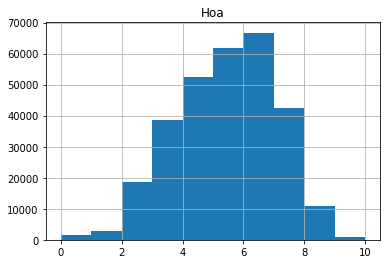

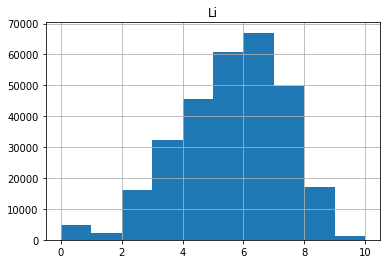

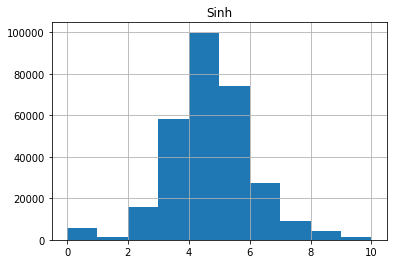

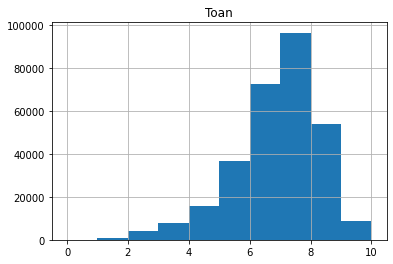

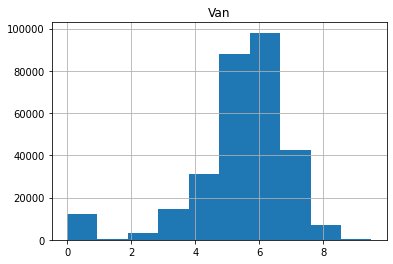

In [52]:
for my_header in header:
    if my_header != 'id' and my_header != 'Ma_mon_ngoai_ngu' and my_header != 'Ngoai_ngu':
        df.hist(my_header)
plt.show()

Xét các môn học khác ngoại ngữ. Phổ điểm trung bình của môn Toán là cao nhất do đỉnh của môn Toán ở thang điểm 8 với số lượng gần 100000. Phổ điểm của Hóa và Lí khá tương đồng nhau, tập trung ở quanh thang điểm 6 đến 7 là cao nhất, ước lượng gần 70000 thí sinh. Tiếp theo là phổ điểm môn Văn tập trung ở khoảng từ thang điểm 5.5 tới 6.5, khoảng gần 100000 thí sinh. Cuối cùng là phổ điểm môn Sinh thấp nhất, tập trung cao nhất trong khoảng từ 4 đến 5 điểm tiếp cận 100000 thí sinh.

array([[<AxesSubplot:title={'center':'N1'}>,
        <AxesSubplot:title={'center':'N2'}>],
       [<AxesSubplot:title={'center':'N3'}>,
        <AxesSubplot:title={'center':'N4'}>],
       [<AxesSubplot:title={'center':'N5'}>,
        <AxesSubplot:title={'center':'N6'}>]], dtype=object)

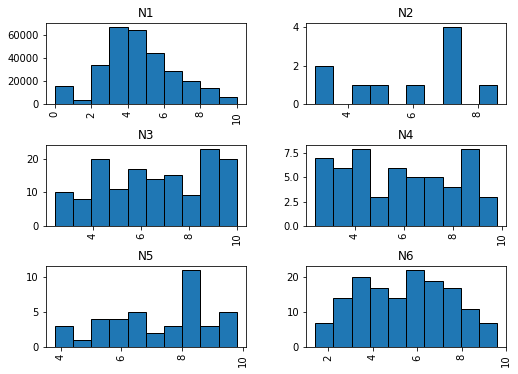

In [53]:
df['Ngoai_ngu'].hist(by=df['Ma_mon_ngoai_ngu'], edgecolor='black', figsize = (8,6))

Đối với môn ngoại ngữ, phần lớn mọi người đăng kí N1. N1 có phổ điểm đỉnh trong khoảng từ 3 đến 5, số lượng trên 60000 thí sinh. Đối với các phổ điểm còn lại có số lượng đăng kí ít và phân bố không đều. Riêng N2 có phổ điểm 7 và N5 có phổ điểm khoảng 8.5 nổi trội hơn các phổ điểm khác.

# Tài liệu tham khảo cho sinh viên
1. Slide lý thuyết
2. Textbook: J. Han and M. Kamber: Data Mining, Concepts and Techniques, Second Edition - Chapter 2: Getting to Know Your Data & Chapter 3: Data Preprocessing

Mọi thắc mắc các bạn gửi mail cho người hướng dẫn thực hành phụ trách: **Kiều Vũ Minh Đức** (kvmduc3@gmail.com).

Tài liệu tham khảo:
1. https://stackoverflow.com/questions/707674/how-to-compare-type-of-an-object-in-python
2. https://vietnambiz.vn/do-lech-chuan-standard-deviation-la-gi-cong-thuc-tinh-do-lech-chuan-2019110216112891.htm#:~:text=C%C3%B4ng%20th%E1%BB%A9c%20t%C3%ADnh%20%C4%91%E1%BB%99%20l%E1%BB%87ch%20chu%E1%BA%A9n,-H%C3%ACnh%20minh%20h%E1%BB%8Da&text=Ph%C6%B0%C6%A1ng%20sai%20cho%20m%E1%BB%97i%20%C4%91i%E1%BB%83m,%C4%91%E1%BB%83%20t%C3%ACm%20%C4%91%E1%BB%99%20l%E1%BB%87ch%20chu%E1%BA%A9n.
3. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
4. https://www.statology.org/pandas-histogram-by-group/